In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
import os

data = os.listdir("./archive")
len(data)

279

In [3]:
data[:10]

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262']

In [4]:
patient_10253 = os.listdir("./archive/10253")

patient_10253_0 = os.listdir("./archive/10253/0")
patient_10253_1 = os.listdir("./archive/10253/1")

print(patient_10253_0[:5])
print(patient_10253_1[:5])

['10253_idx5_x1001_y1001_class0.png', '10253_idx5_x1001_y1051_class0.png', '10253_idx5_x1001_y1101_class0.png', '10253_idx5_x1001_y1151_class0.png', '10253_idx5_x1001_y1201_class0.png']
['10253_idx5_x501_y351_class1.png', '10253_idx5_x501_y401_class1.png', '10253_idx5_x551_y301_class1.png', '10253_idx5_x551_y351_class1.png', '10253_idx5_x551_y401_class1.png']


In [5]:
df_0 = pd.DataFrame()

for path in patient_10253_0:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = 0
    
    data = {"path":"./archive/10253/0/"+path,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class}
    
    df_0 = df_0.append(data, ignore_index=True)
    
    
print(df_0)

df_1 = pd.DataFrame()

for path in patient_10253_1:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = 1
    
    data = {"path":"./archive/10253/1/"+path,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class}
    
    df_1 = df_1.append(data, ignore_index=True)
    
df = df_0.append(df_1).reset_index(drop=True)
df['x_coord'] = df['x_coord'].astype('int')
df['y_coord'] = df['y_coord'].astype('int')

     idc_class                                               path x_coord  \
0          0.0  ./archive/10253/0/10253_idx5_x1001_y1001_class...    1001   
1          0.0  ./archive/10253/0/10253_idx5_x1001_y1051_class...    1001   
2          0.0  ./archive/10253/0/10253_idx5_x1001_y1101_class...    1001   
3          0.0  ./archive/10253/0/10253_idx5_x1001_y1151_class...    1001   
4          0.0  ./archive/10253/0/10253_idx5_x1001_y1201_class...    1001   
..         ...                                                ...     ...   
474        0.0  ./archive/10253/0/10253_idx5_x951_y651_class0.png     951   
475        0.0  ./archive/10253/0/10253_idx5_x951_y701_class0.png     951   
476        0.0  ./archive/10253/0/10253_idx5_x951_y751_class0.png     951   
477        0.0  ./archive/10253/0/10253_idx5_x951_y801_class0.png     951   
478        0.0  ./archive/10253/0/10253_idx5_x951_y851_class0.png     951   

    y_coord  
0      1001  
1      1051  
2      1101  
3      1151  
4    

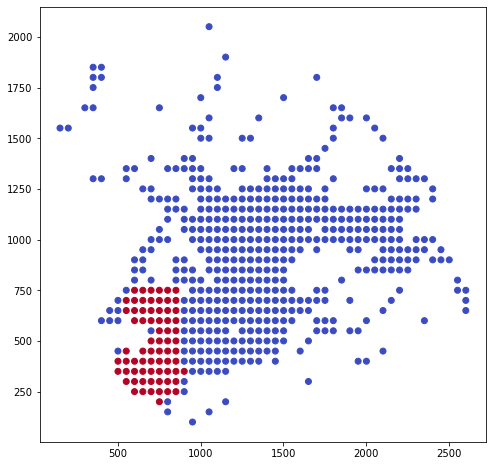

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x = df['x_coord'], y=df['y_coord'], c=df['idc_class'], cmap='coolwarm')
plt.show()

In [7]:
grid = 255*np.ones(shape = (100, 100, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (100, 100, 3)).astype(np.uint8)

In [8]:
grid.shape


(100, 100, 3)

In [9]:
print(df['x_coord'])
print(df['x_coord'].max())

0      1001
1      1001
2      1001
3      1001
4      1001
       ... 
544     851
545     851
546     851
547     851
548     901
Name: x_coord, Length: 549, dtype: int32
2601


In [10]:
print(df['y_coord'])
print(df['y_coord'].max())

0      1001
1      1051
2      1101
3      1151
4      1201
       ... 
544     601
545     651
546     701
547     751
548     351
Name: y_coord, Length: 549, dtype: int32
2051


In [11]:
max_x = df['x_coord'].max()
max_y = df['y_coord'].max()
print(max_x, max_y)
# Shape of (2101, 2651, 3)
# A placeholder for each pixel, with 3 color options and max values for each channel (RGB)
grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

for i in range(len(df)):
        # Get image and label
        image = cv2.imread(df['path'][i])
        idc_class = df['idc_class'][i]
            
        # Extract X and Y coordinates
        x_coord = df['x_coord'][i]
        y_coord = df['y_coord'][i]
        # Add 50 pixels to find ending boundary for each image
        x_end = x_coord + 50
        y_end = y_coord + 50
        
        
        # Assign image pixel values to placeholder 255 values
        """
        Image is something along the lines of:
        [[[206 164 226]
          [196 154 224]
          [211 175 225]
          ...
          [237 221 240]
          [214 184 232]
          [235 213 243]],
          ...        
        """
        # `grid` will then contain each patch's image values encoded into the grid
        
        
        
        #print(grid[y_coord:y_end, x_coord:x_end])
        grid[y_coord:y_end, x_coord:x_end] = image
        
        
        # If `idc_class` is `1`, change the RED channel of the `mask` to 255 (intense red)
        # and other channels to `0` (remove color info, leaving just red)
        if idc_class == 1:
            mask[y_coord:y_end, x_coord:x_end, :1] = 255
            mask[y_coord:y_end, x_coord:x_end, 1:] = 0

2601 2051


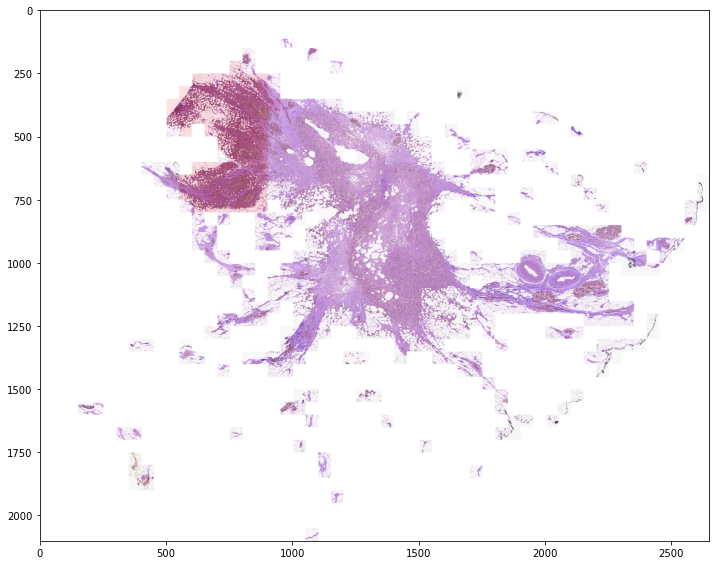

In [12]:
plt.figure(figsize=(12, 12))
plt.imshow(grid)
plt.imshow(mask, alpha=0.1)
plt.show()

In [13]:
from glob import glob
data = glob('./archive/**/*.png', recursive=True)
print(len(data))

277524


In [14]:
dfs = []

for path in data:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    patient_id = split[0].split('\\')[1]
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = split[4][-5]
    
    df_data = {"patient_id": patient_id,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class,
            "path": path}
    df = pd.DataFrame()
    dfs.append(df.append(df_data, ignore_index=True))
    
df_all = pd.concat(dfs)

In [15]:
df_all = df_all.reset_index(drop=True)
df_all

df_all['x_coord'] = df_all['x_coord'].astype('int')
df_all['y_coord'] = df_all['y_coord'].astype('int')
df_all['idc_class'] = df_all['idc_class'].astype('int')

<AxesSubplot:xlabel='idc_class', ylabel='count'>

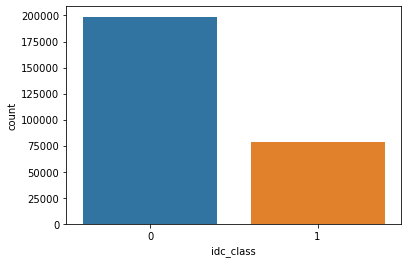

In [16]:
import seaborn as sns
sns.countplot(x='idc_class', data=df_all)

In [17]:
df_all['patient_id'].value_counts()


13693    2395
16550    2302
10288    2278
10308    2278
9323     2216
         ... 
16895     151
9175      118
8957      111
9262       94
16534      63
Name: patient_id, Length: 279, dtype: int64

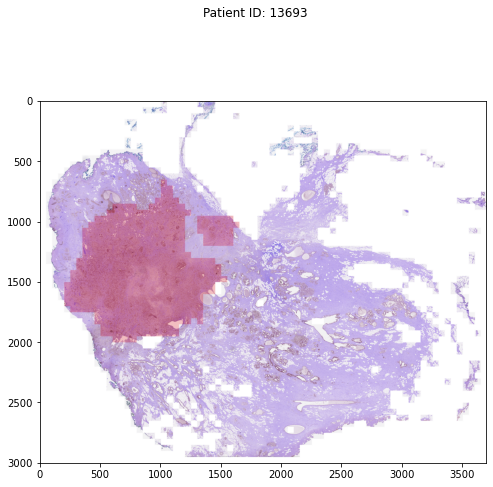

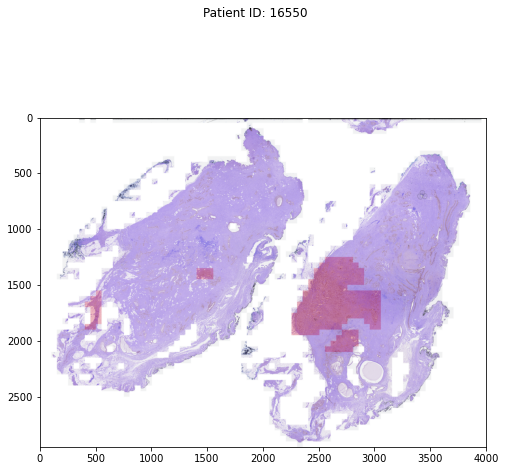

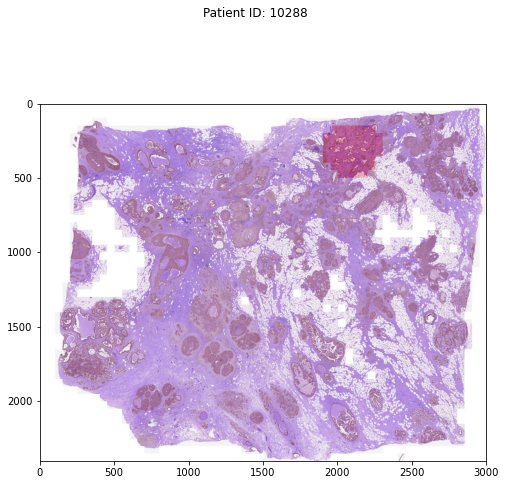

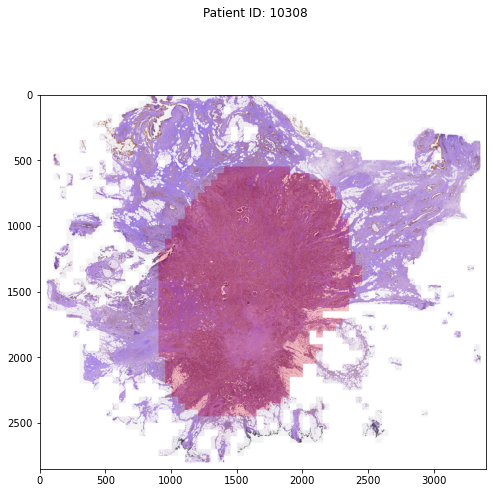

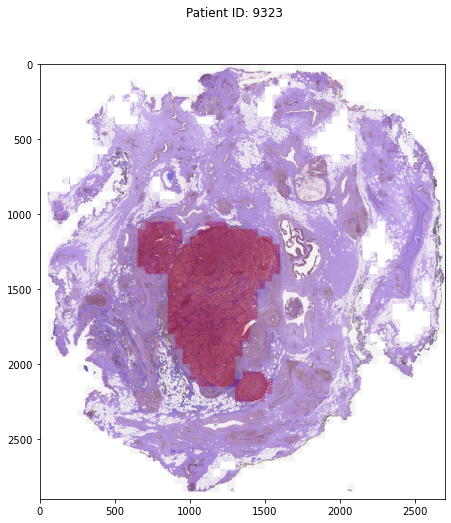

In [18]:
patient_ids = ['13693', '16550', '10288', '10308', '9323']

for patient_id in patient_ids:
    df = df_all.loc[df_all['patient_id'] == patient_id].reset_index(drop=True)
    max_x = df['x_coord'].max()
    max_y = df['y_coord'].max()
    
    grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

    for i in range(len(df)):
        # Get image and label
        image = cv2.imread(df['path'][i])
        if(image.shape==(50, 50, 3)):
            idc_class = df['idc_class'][i]
            x_coord = df['x_coord'][i]
            y_coord = df['y_coord'][i]
            x_end = x_coord + 50
            y_end = y_coord + 50
            
            grid[y_coord:y_end, x_coord:x_end] = image

            if idc_class == 1:
                mask[y_coord:y_end, x_coord:x_end, :1] = 255
                mask[y_coord:y_end, x_coord:x_end, 1:] = 0
                
    plt.figure(figsize=(8, 8))
    plt.suptitle(f'Patient ID: {patient_id}')
    plt.imshow(grid)
    plt.imshow(mask, alpha=0.2)
    plt.show()

In [15]:
import cv2

x = []
y = []

# Loading in 1000 images
for i in data[:1000]:
    if i.endswith('.png'):
        label=i[-5]
        img = cv2.imread(i)
        # Transformation steps, such as resizing
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(label)

In [16]:
# Reduce from float32 for memory footprint
x = np.array(x, dtype='float16')
y = np.array(y, dtype='float16')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.3)

import gc
x = None
y = None
gc.collect()

0

In [17]:
x_train.shape

(700, 200, 200, 3)

In [22]:
if not os.path.exists('./hist_images_truncated/'):
    os.mkdir('./hist_images_truncated/')

    os.mkdir('./hist_images_truncated/train/')
    os.mkdir('./hist_images_truncated/test/')

    os.mkdir('./hist_images_truncated/train/0/')
    os.mkdir('./hist_images_truncated/train/1/')
    os.mkdir('./hist_images_truncated/test/0/')
    os.mkdir('./hist_images_truncated/test/1/')

In [23]:
# enumerate() to get `batch_num`, starting at 1
# range() starting at 1000 and incrementing in steps of 1000 towards the fifth of the length of the dataset
for batch_num, indices in enumerate(range(1000, int(len(data)/5), 1000), 1):
    x = []
    y = []
    
    # Load in `indices-1000` to `indices`
    # 0:1000, 1000:2000, 2000:3000, etc.
    for i in data[indices-1000:indices]:
        if i.endswith('.png'):
            label=i[-5]
            img = cv2.imread(i)
            img = cv2.resize(img,(200,200))
            x.append(img)
            y.append(label)
        
    # Create NumPy Arrays from Python lists
    x = np.array(x, dtype='float16')
    y = np.array(y, dtype='float16')
    
    print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}')
    
    # Perform train-test split
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=0.3)
    
    # For each image in `x_train` - save it, including the associated batch_number and sample in the appropriate directory
    for index, img in enumerate(x_train):
        idc_class = y_train[index]
        cv2.imwrite(f"./hist_images_truncated/train/{int(idc_class)}/batch_{batch_num}sample_{index}.png", img.astype('int'))
    
    # For each image in `x_test` - save it, including the associated batch_number and sample in the appropriate directory
    for index, img in enumerate(x_test):
        idc_class = y_test[index]
        cv2.imwrite(f"./hist_images_truncated/test/{int(idc_class)}/batch_{batch_num}sample_{index}.png", img.astype('int'))

Processing batch 1, with images from 0 to 1000
Processing batch 2, with images from 1000 to 2000
Processing batch 3, with images from 2000 to 3000
Processing batch 4, with images from 3000 to 4000
Processing batch 5, with images from 4000 to 5000
Processing batch 6, with images from 5000 to 6000
Processing batch 7, with images from 6000 to 7000
Processing batch 8, with images from 7000 to 8000
Processing batch 9, with images from 8000 to 9000
Processing batch 10, with images from 9000 to 10000
Processing batch 11, with images from 10000 to 11000
Processing batch 12, with images from 11000 to 12000
Processing batch 13, with images from 12000 to 13000
Processing batch 14, with images from 13000 to 14000
Processing batch 15, with images from 14000 to 15000
Processing batch 16, with images from 15000 to 16000
Processing batch 17, with images from 16000 to 17000
Processing batch 18, with images from 17000 to 18000
Processing batch 19, with images from 18000 to 19000
Processing batch 20, wit

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.3)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('./hist_images_truncated/train/', 
                                                    batch_size=16, subset="training", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
valid_generator = train_datagen.flow_from_directory('./hist_images_truncated/train/', 
                                                    batch_size=16, subset="validation", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
test_generator = test_datagen.flow_from_directory('./hist_images_truncated/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary',
                                                  # Read note below 
                                                  shuffle=False,
                                                  target_size=(200, 200))

Found 36682 images belonging to 2 classes.
Found 15719 images belonging to 2 classes.
Found 22489 images belonging to 2 classes.


In [18]:
if not os.path.exists('./hist_images/'):
    os.mkdir('./hist_images/')

    os.mkdir('./hist_images/train/')
    os.mkdir('./hist_images/test/')

    os.mkdir('./hist_images/train/0/')
    os.mkdir('./hist_images/train/1/')
    os.mkdir('./hist_images/test/0/')
    os.mkdir('./hist_images/test/1/')

In [19]:
from glob import glob
data = glob('./archive/**/*.png', recursive=True)
print(len(data))

277524


In [20]:
for batch_num, indices in enumerate(range(1000, len(data), 1000), 1):
    x = []
    y = []

    for i in data[indices-1000:indices]:
        if i.endswith('.png'):
            label=i[-5]
            img = cv2.imread(i)
            img = cv2.resize(img,(200,200))
            x.append(img)
            y.append(label)
        
        
    x = np.array(x, dtype='float16')
    y = np.array(y, dtype='float16')
    
    print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}')

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.3)

    for index, img in enumerate(x_train):
        idc_class = y_train[index]
        cv2.imwrite(f"./hist_images/train/{int(idc_class)}/batch_{batch_num}_sample_{index}.png", img.astype('int'))

    for index, img in enumerate(x_test):
        idc_class = y_test[index]
        cv2.imwrite(f"./hist_images/test/{int(idc_class)}/batch_{batch_num}_sample_{index}.png", img.astype('int'))

    import gc
    x = None
    y = None
    gc.collect()

Processing batch 1, with images from 0 to 1000
Processing batch 2, with images from 1000 to 2000
Processing batch 3, with images from 2000 to 3000
Processing batch 4, with images from 3000 to 4000
Processing batch 5, with images from 4000 to 5000
Processing batch 6, with images from 5000 to 6000
Processing batch 7, with images from 6000 to 7000
Processing batch 8, with images from 7000 to 8000
Processing batch 9, with images from 8000 to 9000
Processing batch 10, with images from 9000 to 10000
Processing batch 11, with images from 10000 to 11000
Processing batch 12, with images from 11000 to 12000
Processing batch 13, with images from 12000 to 13000
Processing batch 14, with images from 13000 to 14000
Processing batch 15, with images from 14000 to 15000
Processing batch 16, with images from 15000 to 16000
Processing batch 17, with images from 16000 to 17000
Processing batch 18, with images from 17000 to 18000
Processing batch 19, with images from 18000 to 19000
Processing batch 20, wit

Processing batch 154, with images from 153000 to 154000
Processing batch 155, with images from 154000 to 155000
Processing batch 156, with images from 155000 to 156000
Processing batch 157, with images from 156000 to 157000
Processing batch 158, with images from 157000 to 158000
Processing batch 159, with images from 158000 to 159000
Processing batch 160, with images from 159000 to 160000
Processing batch 161, with images from 160000 to 161000
Processing batch 162, with images from 161000 to 162000
Processing batch 163, with images from 162000 to 163000
Processing batch 164, with images from 163000 to 164000
Processing batch 165, with images from 164000 to 165000
Processing batch 166, with images from 165000 to 166000
Processing batch 167, with images from 166000 to 167000
Processing batch 168, with images from 167000 to 168000
Processing batch 169, with images from 168000 to 169000
Processing batch 170, with images from 169000 to 170000
Processing batch 171, with images from 170000 to

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.3)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('./hist_images/train/', 
                                                    batch_size=16, subset="training", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
valid_generator = train_datagen.flow_from_directory('./hist_images/train/', 
                                                    batch_size=16, subset="validation", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
test_generator = test_datagen.flow_from_directory('./hist_images/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary', 
                                                  target_size=(200, 200),
                                                  shuffle=False)

Found 135731 images belonging to 2 classes.
Found 58169 images belonging to 2 classes.
Found 83100 images belonging to 2 classes.
